### Read NetCDF file From BMW

In [13]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# read a netcdf file
filename = "bmw_ncsx_c09r00_out2.nc"
data = nc.Dataset(filename, "r")

In [15]:
# see what's in the file: the variables
print(data.variables.keys())

dict_keys(['series', 'nfp', 'rmin', 'rmax', 'zmin', 'zmax', 'ar_grid', 'ap_grid', 'az_grid', 'br_grid', 'bp_grid', 'bz_grid', 'px_grid', 'py_grid', 'pz_grid', 'jx_grid', 'jy_grid', 'jz_grid'])


In [16]:
rmin, rmax, zmin, zmax = data.variables["rmin"][:].tolist(), data.variables["rmax"][:].tolist(), data.variables["zmin"][:].tolist(), data.variables["zmax"][:].tolist()

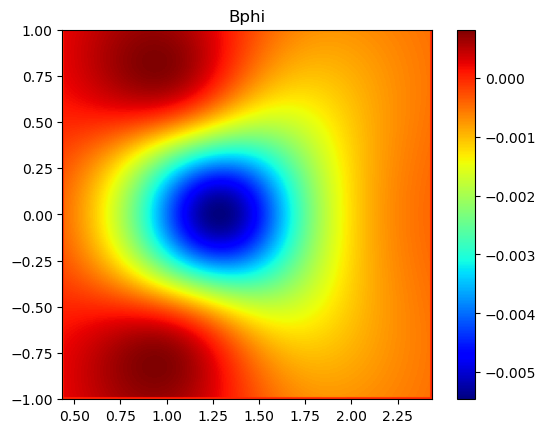

In [17]:
# read br_grid and plot it
br_grid = data.variables["br_grid"][:]
bz_grid = data.variables["bz_grid"][:]
bphi_grid = data.variables["bp_grid"][:]
# use rmin, rmax, zmin, zmax to set the extent of the plot
plt.imshow(bphi_grid[1, :, :], extent=[rmin, rmax, zmin, zmax], cmap='jet', aspect='equal')
plt.colorbar()
plt.title("Bphi")
plt.show()

#### Calculate the magnitude of B field and plot it as a surface plot


In [18]:
magB = np.sqrt(br_grid**2 + bz_grid**2 + bphi_grid**2)

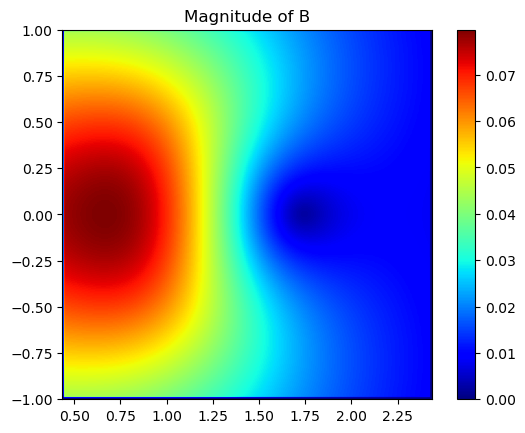

In [19]:
# plot the magnitude of B
plt.imshow(magB[1, :, :], extent=[rmin, rmax, zmin, zmax], cmap='jet', aspect='equal')
plt.colorbar()
plt.title("Magnitude of B")
plt.show()

### Verifying the output of BMW with the output of Beams3D

In [20]:
import h5py

In [21]:
# read the Beams3D data
beam3dFile = "beams3d_ncsx_c09r00_free_birth.h5"
beamData = h5py.File(beam3dFile, 'r')

In [22]:
# read raxis, zaxis, phiaxis
raxis = beamData['/raxis'][()]
zaxis = beamData['/zaxis'][()]
phiaxis = beamData['/phiaxis'][()]

# read b_phi
b_phi = beamData['/B_PHI'][()]
b_r = beamData['/B_R'][()]
b_z = beamData['/B_Z'][()]

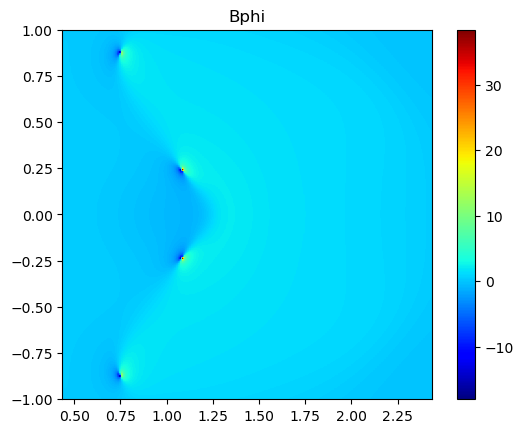

In [23]:
# plot b_phi
plt.imshow(b_phi[:, 0, :], extent=[raxis[0], raxis[-1], zaxis[0], zaxis[-1]], cmap='jet', aspect='equal')
plt.colorbar()
plt.title("Bphi")
plt.show()

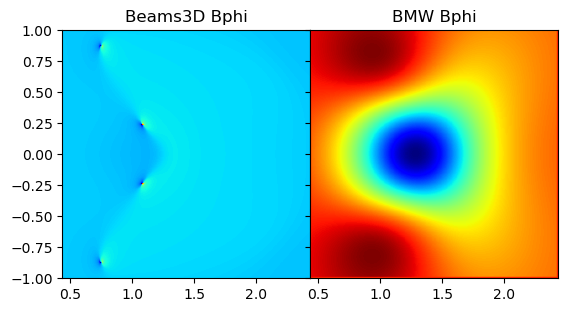

In [30]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].imshow(b_phi[:, 0, :], extent=[raxis[0], raxis[-1], zaxis[0], zaxis[-1]], cmap='jet')
ax[0].set_title("Beams3D Bphi")
ax[1].imshow(bphi_grid[1, :, :], extent=[rmin, rmax, zmin, zmax], cmap='jet')
ax[1].set_title("BMW Bphi")
plt.subplots_adjust(wspace=0)
plt.show()

In [31]:
# export bphi_grid and b_phi to two separate dat files as matrix
np.savetxt("bmw_bphi.dat", bphi_grid[1, :, :])
np.savetxt("beams3d_bphi.dat", b_phi[:, 0, :])